In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load data
df = pd.read_csv("Synthetic_Mall_Customers_500.csv")

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,38,66,7
1,2,0,49,93,14
2,3,1,40,44,79
3,4,1,50,120,7
4,5,1,20,65,9


In [3]:

# Encode gender
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])  # Male=1, Female=0


In [6]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
495,496,1,35,46,93
496,497,1,47,24,53
497,498,0,32,30,55
498,499,1,44,40,32
499,500,0,68,100,51


Above the gender Male changed to 1 and  Female changed to 0

In [7]:
# Select features
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [8]:
# Elbow method to find optimal clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

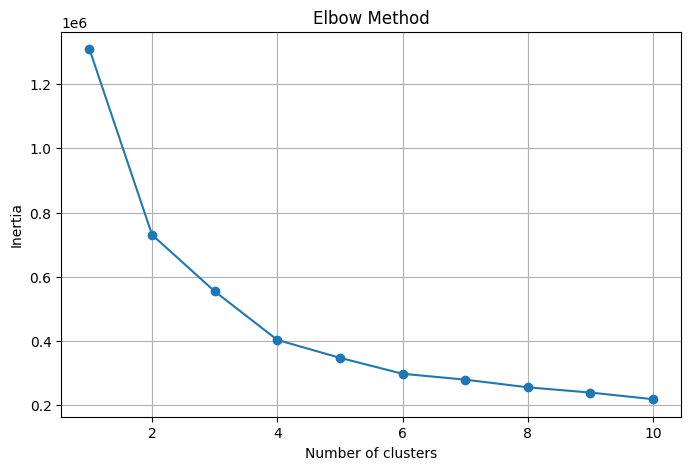

In [9]:
# Plot Elbow
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


**Elbow Method Plot**

Shows a clear bend at 4 clusters → that’s why we picked k=4.

After 5, the inertia (variance within clusters) decreases slowly → no major benefit in increasing k.

In [43]:
# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)

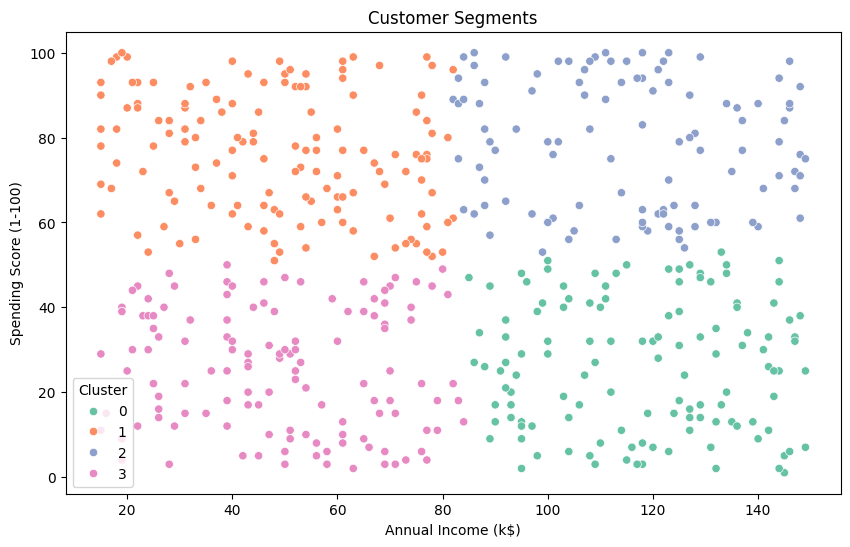

In [44]:
# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', palette='Set2')
plt.title('Customer Segments')
plt.show()

In [45]:
df.groupby("Cluster").mean()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,,
0,259.119048,0.452381,44.968254,118.230159,26.047619
1,264.057143,0.500000,44.842857,48.892857,75.792857
2,230.641509,0.518868,41.405660,115.358491,78.603774
3,243.632812,0.484375,43.492188,48.843750,25.476562


In [46]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, df['Cluster'])
print(f"Silhouette Score: {score:.2f}")


Silhouette Score: 0.33


Range: -1 to 1

Interpretation:

**Greater 0.5:** **bold text** **Strong** structure (clear separation between clusters)

**~0.3–0.5: Reasonable structure**

**less than 0.25: Weak structure**

The clusters are moderately well separated, but there's still some overlap. It’s acceptable, especially in real-world data where perfect clustering is rare.

In [48]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(X, df['Cluster'])
print(f"Davies-Bouldin Score: {db_score:.2f}")


Davies-Bouldin Score: 1.06


Davies-Bouldin Score: 1.02
Range: 0 to ∞ (Lower is better)

Rule of thumb:

~0.5–1.5 : Good

Greater than 2 : Poor clustering

The clusters are well-formed and distinct, though there should be improvement.

In [49]:
cluster_labels = {
    0: 'High Income - Low Spending',
    1: 'Low Income - High Spending',
    2: 'High Income - High Spending',
    3: 'Low Income - Low Spending'
}

df['Segment'] = df['Cluster'].map(cluster_labels)


In [50]:
segment_summary = df.groupby('Segment').mean(numeric_only=True)
print(segment_summary)


                             CustomerID    Gender        Age  \
Segment                                                        
High Income - High Spending  230.641509  0.518868  41.405660   
High Income - Low Spending   259.119048  0.452381  44.968254   
Low Income - High Spending   264.057143  0.500000  44.842857   
Low Income - Low Spending    243.632812  0.484375  43.492188   

                             Annual Income (k$)  Spending Score (1-100)  \
Segment                                                                   
High Income - High Spending          115.358491               78.603774   
High Income - Low Spending           118.230159               26.047619   
Low Income - High Spending            48.892857               75.792857   
Low Income - Low Spending             48.843750               25.476562   

                             Cluster  
Segment                               
High Income - High Spending      2.0  
High Income - Low Spending       0.0  
Low Inco

| Segment                         | Income Level | Spending Behavior | Business Insight                                                                                   |
| ------------------------------- | ------------ | ----------------- | -------------------------------------------------------------------------------------------------- |
| **High Income - High Spending** | High         | High              | 🟢 *Most valuable customers (loyal and profitable). Consider offering exclusive loyalty programs.* |
| **High Income - Low Spending**  | High         | Low               | 🟡 *Potential customers — can be targeted with premium upselling campaigns.*                       |
| **Low Income - High Spending**  | Low          | High              | 🟠 *Impulse buyers — offer value deals or smart bundles.*                                          |
| **Low Income - Low Spending**   | Low          | Low               | 🔴 *Least active — possibly retain via discounts or feedback surveys.*                             |
